In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import cmath

In [38]:
A=1-5j
B=2j
kappa=1
a=0.1+0.2j
a+B/2

(0.1+1.2j)

In [39]:
def Cauchy(z):
    s=integrate.quad(lambda x: (x-z.real)*np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    return s/np.sqrt(np.pi)
I = np.vectorize(Cauchy)


def lambda_z(A, B, kappa, z):
    return (a*(A**2+kappa**2*z**2)-B*z**4-B*z**5*I(z))/(A**2+kappa**2*z**2)

def lambda_z_wave(A, B, kappa, z):
    return (a*(A**2+kappa**2*z**2)-B*z**4-B*z**5*I(z))

def lambda_plus(A, B, kappa, z):
    y=a-B*z**4/((A**2+kappa**2*z**2))-B*z**5*(-2*special.dawsn(z))/((A**2+kappa**2*z**2))-np.pi*1j*B*z**5*np.exp(-z**2)/(np.sqrt(np.pi)*(A**2+kappa**2*z**2))
    return y#*(A**2+kappa**2*z**2)/(z+1j)**2
lambda_plus = np.vectorize(lambda_plus)

def lambda_0(A, B, kappa, z):
    y=a-B*z**4/((A**2+kappa**2*z**2))-B*z**5*(-2*special.dawsn(z))/((A**2+kappa**2*z**2))#-np.pi*1j*B*z**5*np.exp(-z**2)/(np.sqrt(np.pi)*(A**2+kappa**2*z**2))
    return y#*(A**2+kappa**2*z**2)
lambda_plus = np.vectorize(lambda_plus)

def lambda_plus_wave(A, B, kappa, z):
    y=a-B*z**4/((A**2+kappa**2*z**2))-B*z**5*(-2*special.dawsn(z))/((A**2+kappa**2*z**2))-np.pi*1j*B*z**5*np.exp(-z**2)/(np.sqrt(np.pi)*(A**2+kappa**2*z**2))
    return y*(A**2+kappa**2*z**2)
lambda_plus_wave = np.vectorize(lambda_plus_wave)



#Для поиска корней:

def M_plus(A, B, kappa, t):
    return (a*(A**2+kappa**2*t**2)-B*t**4-B*t**5*(-2*special.dawsn(t))-np.sqrt(np.pi)*1j*B*t**5*np.exp(-t**2))/(kappa*t+A*1j)**2
M_plus=np.vectorize(M_plus)
def M_minus(A, B, kappa, t):
    return (a*(A**2+kappa**2*t**2)-B*t**4-B*t**5*(-2*special.dawsn(t))+np.sqrt(np.pi)*1j*B*t**5*np.exp(-t**2))/(kappa*t-A*1j)**2
M_minus=np.vectorize(M_minus)
def M(A, B, kappa, t):
    return (a*(A**2+kappa**2*t**2)-B*t**4-B*t**5*I(t))/(kappa*t+A*1j)**2

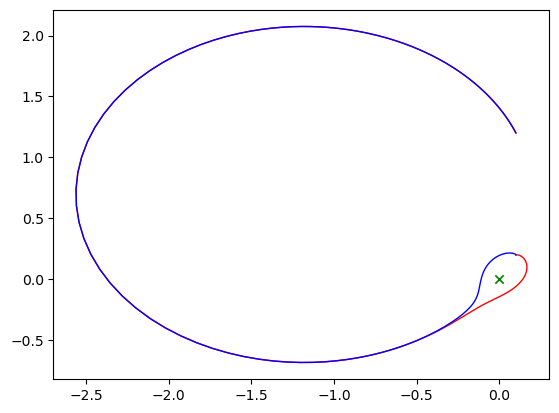

In [40]:
plt.scatter(0, 0,color='g',lw=1.2, marker="x")
z=np.linspace(-150,0, 3000)
y=lambda_plus(A, B, kappa, z)
plt.plot(y.real,y.imag,color='red',lw=1)

z=np.linspace(0,150, 3000)
y=lambda_plus(A, B, kappa, z)
plt.plot(y.real,y.imag,color='b',lw=1)

plt.show()


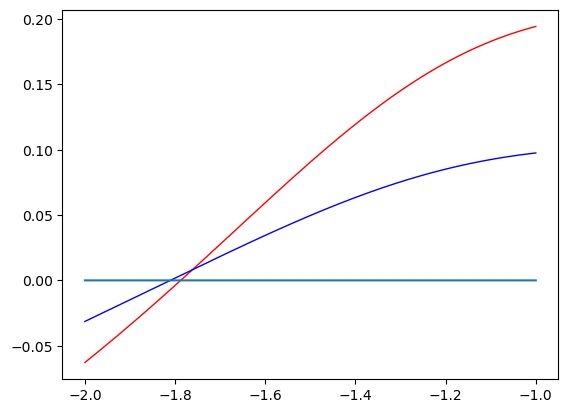

In [41]:
z=np.linspace(-2,-1, 5000)
y=lambda_0(A, B, kappa, z)
plt.plot(z,y.imag,color='red',lw=1)
plt.plot(z.real,y.real,color='b',lw=1)
plt.plot(z, 0*z)

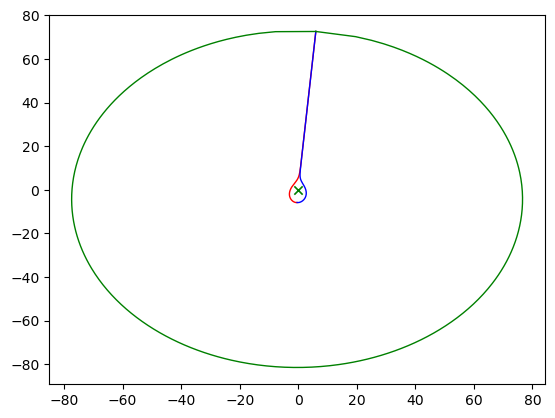

In [42]:
r=8
plt.scatter(0, 0,color='g',lw=1.2, marker="x")
z=np.linspace(-r,0, 500)
y=lambda_plus_wave(A, B, kappa, z)
plt.plot(y.real,y.imag,color='red',lw=1)

z=np.linspace(0,r, 500)
y=lambda_plus_wave(A, B, kappa, z)
plt.plot(y.real,y.imag,color='b',lw=1)

x=np.linspace(-r,r, 500)
y=np.sqrt(r**2-x**2)
z=x+1j*y+0.000001j
plt.plot(lambda_z_wave(A, B, kappa, z).real, lambda_z_wave(A, B, kappa, z).imag, color='g', lw=1)

plt.show()

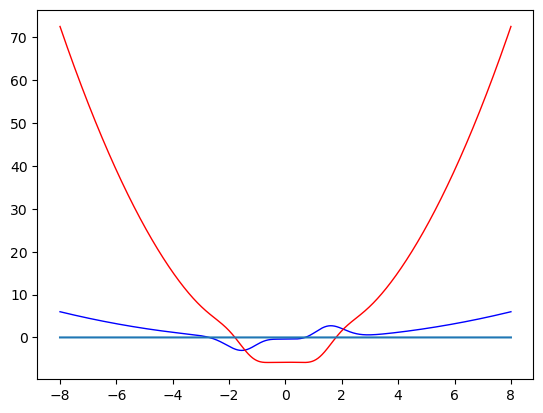

In [43]:
z=np.linspace(-r,r, 5000)
y=lambda_plus_wave(A, B, kappa, z)
plt.plot(z,y.real,color='b',lw=1)
plt.plot(z,y.imag,color='red',lw=1)
plt.plot(z, 0*z)
plt.show()

In [ ]:
def y1(A, B, kappa, t):
      return cmath.log((((t+1j)/(t-1j))**4)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))
y1=np.vectorize(y1)

def y2(A, B, kappa, t):
   eps=1e-10
   nev=-cmath.log((((t+1j)/(t-1j))**4)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))
   nev+=cmath.log(-(((t+1j)/(t-1j))**4)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))
   if abs(nev.imag-np.pi)<eps:
      nev=0
   return 2*nev.imag
y2=np.vectorize(y2)

def y3(A, B, kappa, t):
   eps=1e-10
   nev=-cmath.log((((t+1j)/(t-1j))**4)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))
   nev+=cmath.log(-(((t+1j)/(t-1j))**4)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))
   if abs(nev.imag+np.pi)<eps:
      nev=0
   return 2*nev.imag
y3=np.vectorize(y3)

def y(A, B, kappa, t):
   if t<0:
      f=y1(A, B, kappa, t)+y3(A, B, kappa, t)*1j
   elif t>0:
      f=y1(A, B, kappa, t)+y2(A, B, kappa, t)*1j
   else:
      f=0
   return f
y=np.vectorize(y)

def Gamma(A, B, kappa, t):
    s=1j*integrate.quad(lambda x: (x-t.real)*y(A, B, kappa, x).imag/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    s=s-t.imag*integrate.quad(lambda x: y(A, B, kappa, x).imag/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    s=s+integrate.quad(lambda x: (x-t.real)*y(A, B, kappa, x).real/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    s=s+1j*t.imag*integrate.quad(lambda x: y(A, B, kappa, x).real/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    return s/(2*np.pi*1j)
gamma=np.vectorize(Gamma)


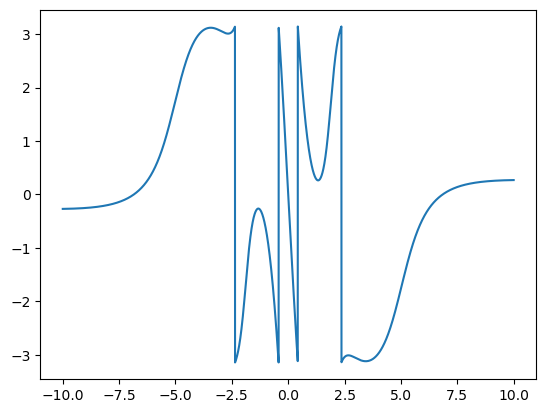

In [45]:
x=np.linspace(-10, 10,  5000)
plt.plot(x,y1(A, B, kappa, x).imag)
plt.show()

In [46]:
def point(A, B, kappa):
    eps=1e-5
    t=np.linspace(-2.5, 2.5, 1000000)
    list=[]
    f=y1(A, B, kappa, t).imag#cmath.log((((t+1j)/(t-1j))**2)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))
    for i in range(len(f)):
        if abs(np.pi-f[i])<=eps:
            list.append(t[i])
    return list

In [47]:
p=point(A, B, kappa)

In [48]:
p

[-2.3585048585048587,
 -2.3584998584998584,
 0.42600792600792614,
 2.3584948584948586]

In [51]:
def y(A, B, kappa, t):
   if p[2]<=t<=-p[0]:
       f=cmath.log((((t+1j)/(t-1j))**4)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))-2*np.pi*1j
   elif p[0]<=t<=-p[2]:
      f=cmath.log((((t+1j)/(t-1j))**4)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))+2*np.pi*1j
   else:
      f=cmath.log((((t+1j)/(t-1j))**4)*M_plus(A, B, kappa, t)/M_minus(A, B, kappa, t))
   return f
y=np.vectorize(y)
def Gamma(A, B, kappa, t):
    s=1j*integrate.quad(lambda x: (x-t.real)*y(A, B, kappa, x).imag/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    s=s-t.imag*integrate.quad(lambda x: y(A, B, kappa, x).imag/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    s=s+integrate.quad(lambda x: (x-t.real)*y(A, B, kappa, x).real/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    s=s+1j*t.imag*integrate.quad(lambda x: y(A, B, kappa, x).real/((x-t.real)**2+t.imag**2), -np.inf, np.inf)[0]
    return s/(2*np.pi*1j)
gamma=np.vectorize(Gamma)

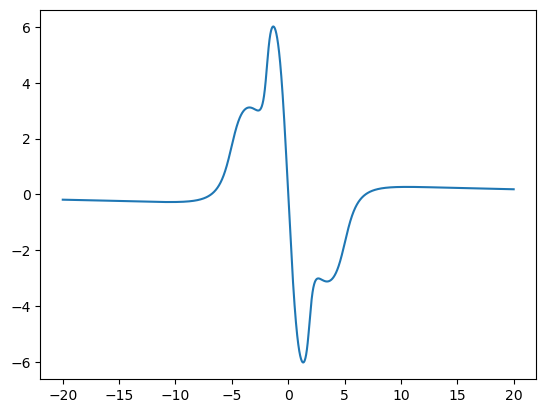

In [52]:
x=np.linspace(-20, 20,  5000)
plt.plot(x,y(A, B, kappa, x).imag)
plt.show()

In [53]:
def F(A, B, kappa, z):
    M_inf=a+B/2
    return (M(A, B, kappa, z)*(z+1j)**4)/(M_inf*np.exp(gamma(A, B, kappa, z)))

In [54]:
def root(A, B, kappa, a1, b1):
    u=(F(A, B, kappa, a1)*b1**2-F(A, B, kappa, b1)*a1**2)/(b1**2-a1**2)+(a1**2)*b1**2
    v=(F(A, B, kappa, a1)-F(A, B, kappa, b1))/(b1**2-a1**2)+b1**2+a1**2
    z_1=cmath.sqrt((v+cmath.sqrt(v**2-4*u))/2)
    z_2=cmath.sqrt((v-cmath.sqrt(v**2-4*u))/2)
    return z_1, z_2
root=np.vectorize(root)

In [55]:
z,z1=root(A, B, kappa, 1+1j, 1+3j)
print(z, z1)

(1.907542500908367-0.35144065234596544j) (1.8641797517807008+0.3461075389331861j)


In [57]:
lambda_z(A, B, kappa, z1)

(3.337890440396666e-14+1.01826104973306e-14j)

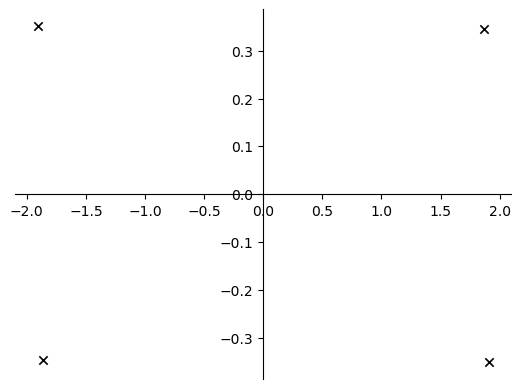

In [58]:
plt.scatter(z.real,z.imag,color='k',lw=1.2, marker="x")
plt.scatter(-z.real,-z.imag,color='k',lw=1.2, marker="x")
plt.scatter(z1.real,z1.imag,color='k',lw=1.2, marker="x")
plt.scatter(-z1.real,-z1.imag,color='k',lw=1.2, marker="x")

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()
